## Logistic Regression 

*Created by Meghana Bhimasani, June 5, 2020*

Sources: https://towardsdatascience.com/real-world-implementation-of-logistic-regression-5136cefb8125, https://medium.com/@erika.dauria/accuracy-recall-precision-80a5b6cbd28d

Logistic Regression is a statistical method for predicting binary outcomes from data.
Examples of this are "yes" vs "no" or "young" vs "old".
These are categories that translate to probability of being a 0 or a 1.
We can calculate logistic regression by adding an activation function as the final step to our linear model.
This converts the linear regression output to a probability.

#### Note: Although it has "regression" in its name, it is often used for classification in machine learning. 

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import os

# Voice Gender
Gender Recognition by Voice and Speech Analysis

This database was created to identify a voice as male or female, based upon acoustic properties of the voice and speech. The dataset consists of 3,168 recorded voice samples, collected from male and female speakers. The voice samples are pre-processed by acoustic analysis in R using the seewave and tuneR packages, with an analyzed frequency range of 0hz-280hz (human vocal range).

## The Dataset
The following acoustic properties of each voice are measured and included within the CSV:

* meanfreq: mean frequency (in kHz)
* sd: standard deviation of frequency
* median: median frequency (in kHz)
* Q25: first quantile (in kHz)
* Q75: third quantile (in kHz)
* IQR: interquantile range (in kHz)
* skew: skewness (see note in specprop description)
* kurt: kurtosis (see note in specprop description)
* sp.ent: spectral entropy
* sfm: spectral flatness
* mode: mode frequency
* centroid: frequency centroid (see specprop)
* peakf: peak frequency (frequency with highest energy)
* meanfun: average of fundamental frequency measured across acoustic signal
* minfun: minimum fundamental frequency measured across acoustic signal
* maxfun: maximum fundamental frequency measured across acoustic signal
* meandom: average of dominant frequency measured across acoustic signal
* mindom: minimum of dominant frequency measured across acoustic signal
* maxdom: maximum of dominant frequency measured across acoustic signal
* dfrange: range of dominant frequency measured across acoustic signal
* modindx: modulation index. Calculated as the accumulated absolute difference between adjacent measurements of fundamental frequencies divided by the frequency range
* label: male or female

In [2]:
voice = pd.read_csv(os.path.join('Resources', 'voice.csv'))
voice.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


### **Visualize our data**

In [3]:
voice.dtypes

meanfreq    float64
sd          float64
median      float64
Q25         float64
Q75         float64
IQR         float64
skew        float64
kurt        float64
sp.ent      float64
sfm         float64
mode        float64
centroid    float64
meanfun     float64
minfun      float64
maxfun      float64
meandom     float64
mindom      float64
maxdom      float64
dfrange     float64
modindx     float64
label        object
dtype: object

In [4]:
voice.isnull().sum()

meanfreq    0
sd          0
median      0
Q25         0
Q75         0
IQR         0
skew        0
kurt        0
sp.ent      0
sfm         0
mode        0
centroid    0
meanfun     0
minfun      0
maxfun      0
meandom     0
mindom      0
maxdom      0
dfrange     0
modindx     0
label       0
dtype: int64

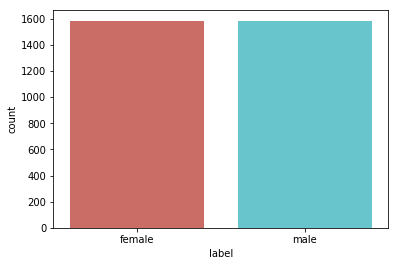

In [5]:
voice["label"] = voice["label"].astype('category')
voice["label_cat"] = voice["label"].cat.codes # another type of label encoding!
# voice.head()
voice.label_cat.value_counts()
sns.countplot(x = 'label', data = voice, palette = 'hls')
plt.show()

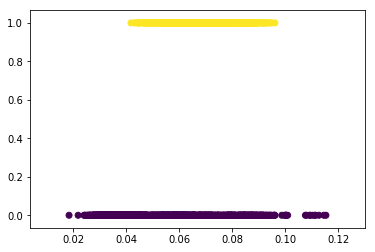

In [6]:
plt.scatter(voice.values[:,1],voice.values[:,-1],c=voice.values[:,-1])

In [7]:
# Assign X (data) and y (target)

X = voice.drop(["label","label_cat"], axis=1)
y = voice["label_cat"]
print(X.shape, y.shape)

(3168, 20) (3168,)


### **Split our data into training and testing**

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, stratify=y)

### **Create a Logistic Regression Model**

In [9]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier

LogisticRegression()

### **Fit (train) or model using the training data**

In [10]:
classifier.fit(X_train, y_train)

/Users/NUBES/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()

### **Validate the model using the test data**

In [11]:
print(f"Training Data Score: {classifier.score(X_train, y_train)}")
print(f"Testing Data Score: {classifier.score(X_test, y_test)}")

Training Data Score: 0.9111952861952862
Testing Data Score: 0.9191919191919192


### **Make predictions**

In [12]:
y_pred = classifier.predict(X_test)
print(f"First 10 Predictions:   {y_pred[:10]}")
print(f"First 10 Actual labels: {y_test[:10].tolist()}")

# male = 0, female = 1

First 10 Predictions:   [1 0 1 1 1 1 1 0 1 1]
First 10 Actual labels: [0, 0, 1, 0, 1, 1, 0, 0, 1, 1]


In [13]:
view = pd.DataFrame({"Actual": y_test, "Prediction": y_pred}).reset_index(drop=True)
view.head(20)

,Actual,Prediction
0,0,1
1,0,0
2,1,1
3,0,1
4,1,1
5,1,1
6,0,1
7,0,0
8,1,1
9,1,1


### Let's plot the confusion matrix

<img src="img/confusion matrix.png" width=60% height=60% />

In [14]:
#### Method 1: with pandas #####
# confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
# sns.heatmap(confusion_matrix, annot=True)

#### Method 2: with sklearn metrics ####
from sklearn import metrics
import numpy as np
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix # plot confusion matrix as array

array([[342,  54],
       [ 10, 386]])

Text(0.5, 257.44, 'Predicted label')

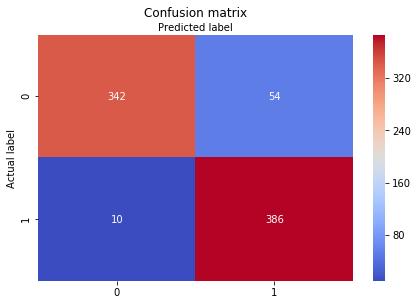

In [15]:
# plot confusion matrix as heat map
class_names=[1,2]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="coolwarm" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [16]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.9191919191919192
Precision: 0.8772727272727273
Recall: 0.9747474747474747


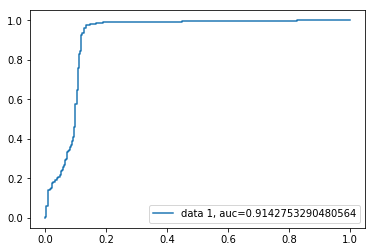

In [17]:
y_pred_proba = classifier.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()